<a href="https://colab.research.google.com/github/shirin1996/ENSF619.2_Assignments/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/rmsouza01/ENSF619.2.git
! git clone https://github.com/rmsouza01/siamxt.git; cd siamxt; python setup.py install

In [2]:
import numpy as np # numpy is used for building siamxt in array style!    
from PIL import Image # We are using PIL to read images 
import matplotlib.pyplot as plt # and matplotlib to display images
import siamxt

**Part 1)** Using the max tree area signature analysis, determined CCs in the max tree that separate Mona Lisa’s face from the background

Image shape is (317, 213)


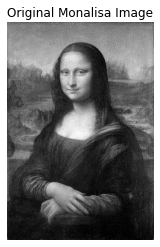

Text(0.5, 1.0, 'Reconstruction at h = 85')

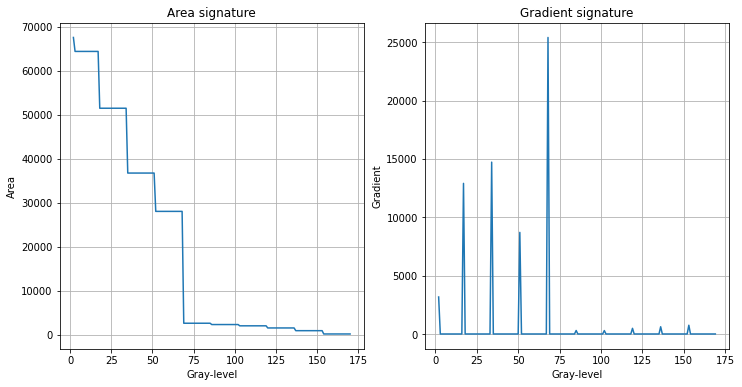

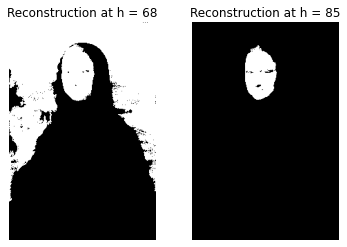

In [3]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/monalisa.png").convert("L"))
print(f'Image shape is {img.shape}')

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original Monalisa Image")
plt.show()

#Structuring element with connectivity-4 
Bc = np.zeros((3,3), dtype = bool)
Bc[1,:] = True
Bc[:,1] = True

# Building the max-tree
mxt = siamxt.MaxTreeAlpha(img,Bc)

#Hand-picked regional maxima
x,y = 83,90

# Node corresponding to a regional maximum
node = mxt.node_index[x, y]

# Extracting area attribute from NA
area = mxt.node_array[3,:]

# Area signature computation
levels,signature =  mxt.getSignature(area, node)

#Gradient of the area signature
gradient = signature[0:-1] - signature[1:]

# Display area signature
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.plot(levels,signature)
plt.grid()
plt.xlabel("Gray-level")
plt.ylabel("Area")
plt.title("Area signature")


# Display gradient of the area signature
plt.subplot(122)
plt.grid()
plt.plot(levels[0:-1],gradient)
plt.xlabel("Gray-level")
plt.ylabel("Gradient")
plt.title("Gradient signature")


# Selecting the peak of the gradient
index = np.argsort(gradient)[::-1][0]

#reconstructing the node corresponding to the peak (largest area)
area1 = signature[index]
node1 = np.where(mxt.node_array[3,:] == area1)[0][0]
cc1 = mxt.recConnectedComponent(node1)

#reconstructing the node corresponding to the peak (smaller area)
area2 = signature[index + 1]
node2 = np.where(mxt.node_array[3,:] == area2)[0][0]
cc2 = mxt.recConnectedComponent(node2)

#Displaying the nodes reconstructed    
fig = plt.figure()
plt.subplot(121)
plt.imshow(cc1, cmap='Greys_r')
plt.axis('off')
plt.title(f'Reconstruction at h = {mxt.node_array[2,node1]}')
plt.subplot(122)
plt.imshow(cc2, cmap='Greys_r')
plt.axis('off')
plt.title(f'Reconstruction at h = {mxt.node_array[2,node2]}')

**Part 2)** Apply a series of filters to this image to segment the carotid arteries wall

(322, 322)


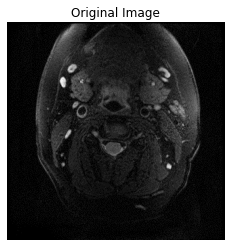

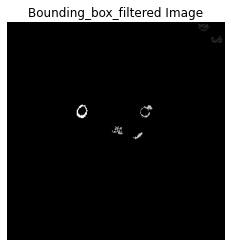

In [7]:
# in order the code to be more organized, we decided to define some functions to do the related jobs or structuing element w/ 8-connectivily

#step 1
def structure_with_eight_connectivity():
    Bc = np.ones((3,3), dtype = bool)
    return Bc

#step 2
def bounding_box_filter(img, Wmin, Hmin, Wmax, Hmax, rr_min, rr_max):
    '''
    in order the code to be organized, we bulid the bounding box filter
    as a function 
    '''
    # Building the max-tree of the negated image, i.e. min-tree
    mxt = siamxt.MaxTreeAlpha(img, structure_with_eight_connectivity())

    # Bounding box-lengths
    dx = mxt.node_array[7,:] - mxt.node_array[6,:]
    dy = mxt.node_array[10,:] - mxt.node_array[9,:]
    # Rectangularity ratio
    RR = mxt.computeRR()
    # Node selection criteria
    nodes = (dx>Hmin) & (dx<Hmax) & (dy > Wmin) & (dy < Wmax) & (RR > rr_min) & (RR < rr_max)
    #Filtering the max-tree
    mxt.contractDR(nodes)
    # Recovering the filtered the image
    img_filtered = mxt.getImage()
    return img_filtered


#step 3
#function for showing the image afterward
def show_image(img, title):
    fig = plt.figure()
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()


#step 4
# Loading the image.
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/carotid.png").convert("L"))
print(img.shape)
#using the show_image function we built in previous cell
show_image(img, "Original Image")

Wmin = 12.94  # Minimum bounding-box width
Hmin = 6.93 # Minimum bounding-box height
Wmax = 18 # Maximum bounding-box width
Hmax = 19.6 # Maximum bounding-box height
rr_min = 0.28 # Minimum rectangularity ratio
rr_max = 0.37 # Maximum rectangularity ratio

#applying the bounding box filter on with the parameter values defined above!
img_filtered = bounding_box_filter(img, Wmin, Hmin, Wmax, Hmax, rr_min, rr_max)
show_image(img_filtered, "Bounding_box_filtered Image")    



**Parte 3)** Apply a series of filters to remove the white artifacts in the image



Image shape is:(320, 213)


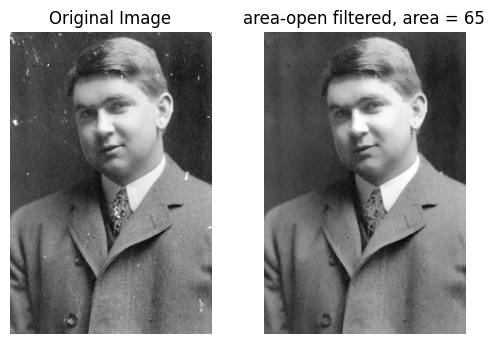

In [6]:
#step 1
#fuction for getting the negative of the image for further process
def get_negative_img(img):
  # Negating the image
  img_max = img.max()
  img_neg = img_max-img
  return img_neg

#step 2
#function for structuring the image with 8-connectivity 
def structure_with_eight_connectivity():
    Bc = np.ones((3,3), dtype = bool)
    return Bc

#step 3  
#building area-open filter
def area_open_filter(img, Bc, area):
  #Building the max-tree of the negated image, i.e. min-tree
  mxt = siamxt.MaxTreeAlpha(img,Bc)
  #Applying an area-open filter
  mxt.areaOpen(area)
  #Recovering the image 
  img_filtered =  mxt.getImage()
  return img_filtered

#step 4
# Loading the image.
img = np.asarray(Image.open("/content/ENSF619.2/Assignment01/Images/filtering-image.jpg").convert("L"))
print(f'Image shape is:{img.shape}')

# Area threshold
area = 65
#applying area filter
img_filtered = area_open_filter(img, Bc, area)

# Negating the image back
#img_filtered = img_max -img_filtered

#Displaying the filtered image
def plot_image(img,title_1,title_2):
  fig = plt.figure(dpi=100)
  plt.subplot(1,2,1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title(title_1)

  plt.subplot(1,2,2)
  plt.imshow(img_filtered, cmap='gray')
  plt.axis('off')
  plt.title(f'{title_2}, area = {area}')

plot_image(img,"Original Image","area-open filtered")  


**Part 4)** Apply a series of filters that will remove all objects in the image except for the two pens

In [ ]:
#for this section, we import some more libararies
from PIL import Image, ImageFilter, ImageOps
from scipy.ndimage import gaussian_filter

In [ ]:
#for this question, we upload the image in the drive and mount it
drive.mount('/content/gdrive')

In [ ]:
# Visualize grayscale images
def show_image(im):
  plt.imshow(im, cmap='gray')
  plt.axis('off')
  plt.show()

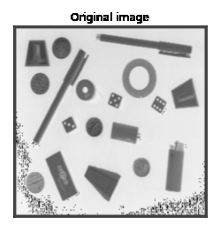

In [ ]:
# Loading image
im_path = 'gdrive/MyDrive/sample_image.png'
im = Image.open(im_path)
# Converting to numpy array and getting rid of unnecessary channels
im = np.array(im)[:,:,0]
show_image(im)

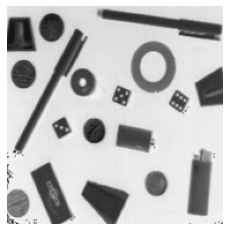

In [ ]:
w, h = im.shape
w_crop_size = int(w * 0.12)
h_crop_size = int(h * 0.1)
# Center cropping the image: Getting rid of the text at the top and the four strips
center_cropped_im = im[w_crop_size: w - w_crop_size, h_crop_size: h - h_crop_size]
show_image(center_cropped_im)

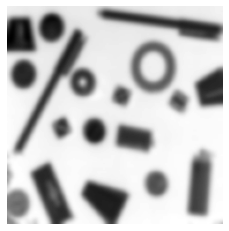

In [ ]:
# getting rid of the noise by applying a gaussian filter to the image
blurred_im = gaussian_filter(center_cropped_im, sigma=2)
show_image(blurred_im)

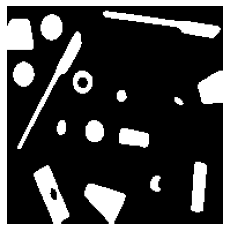

In [ ]:
# Removing the bright background and keeping the dark bjects
initial_mask = blurred_im < 128
show_image(initial_mask)

In [ ]:
dx = [-1, 0, 0, 1]
dy = [0, -1, 1, 0]

# Running a DFS to identify all pixels belonging to a connected component
def fill(x, y, object_matrix, initial_mask, object_id):
  object_matrix[x][y] = object_id

  # Iterating over all 4 neighbors (4 directions)
  for k in range(4):
    nx = x + dx[k]
    ny = y + dy[k]

    # check if the neighbor is valid
    if nx < 0 or ny < 0 or nx >= object_matrix.shape[0] or ny >= object_matrix.shape[1] or initial_mask[nx][ny] == False:
      continue

    # check if the neighbor is not previously visited
    if object_matrix[nx][ny] != 0:
      continue

    fill(nx, ny, object_matrix, initial_mask, object_id)

In [ ]:
object_matrix = np.zeros(initial_mask.shape)
object_count = 0

for i in range(object_matrix.shape[0]):
  for j in range(object_matrix.shape[1]):
    # Check if the pixel belongs to a new object
    if initial_mask[i][j] == True and object_matrix[i][j] == 0:
      object_count += 1
      fill(i, j, object_matrix, initial_mask, object_count)

print('Number of objects detected in the image:', object_count)

Number of objects detected in the image: 16


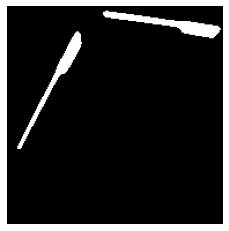

In [ ]:
# Object1 and Object 4 are our two pens. Keep them and remove everything else.
pen_mask = (object_matrix == 1) + (object_matrix == 4)
show_image(pen_mask)

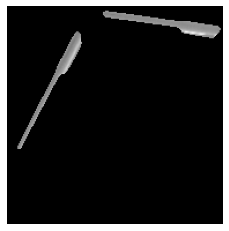

In [ ]:
# Apply the segmentation mask to the original image
show_image(np.multiply(pen_mask, center_cropped_im))

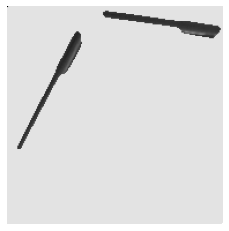

In [ ]:
# Reconstructing the background
background_color = center_cropped_im[1][1]
blurry_background = np.full(center_cropped_im.shape, background_color)
blurry_background[0][0] = np.min(center_cropped_im)
blurry_background[-1][-1] = np.max(center_cropped_im)

# Adding the pens to the background
final_result = np.multiply(1 - pen_mask, blurry_background) + np.multiply(pen_mask, center_cropped_im)

# Visualizing the final result
show_image(final_result)